In [33]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

import numpy as np
X_train = np.load('gdrive/My Drive/dataset/dataset2/trainX.npy')
y_train = np.load('gdrive/My Drive/dataset/dataset2/trainy.npy')
X_test = np.load('gdrive/My Drive/dataset/dataset2/testX.npy')
y_test = np.load('gdrive/My Drive/dataset/dataset2/testy.npy')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Mounted at /content/drive
Mounted at /content/gdrive
(44339, 128, 6) (44339, 20) (4936, 128, 6) (4936, 20)


In [34]:
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import save, load
from pandas import read_csv
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input ,concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers

In [35]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
validation_data=(X_validation, y_validation)

In [43]:
CNN_model= Sequential()
CNN_model.add(Conv1D(filters=32, kernel_size=9, strides=2, activation='relu', input_shape=(n_timesteps,n_features)))
CNN_model.add(MaxPooling1D(pool_size=2 ,strides=2))
CNN_model.add(Dropout(0.5))
CNN_model.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu'))
CNN_model.add(Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2 ,strides=2))
CNN_model.add(Dropout(0.5))
CNN_model.add(Conv1D(filters=128, kernel_size=1, strides=1, activation='relu'))
CNN_model.add(Flatten())
CNN_model.add(Dense(n_outputs, activation='softmax'))
CNN_model.summary()
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
CNN_model.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=128,callbacks=callbacks)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 60, 32)            1760      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 30, 32)           0         
 g1D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 30, 32)            0         
                                                                 
 conv1d_29 (Conv1D)          (None, 28, 64)            6208      
                                                                 
 conv1d_30 (Conv1D)          (None, 26, 128)           24704     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 13, 128)          0         
 g1D)                                                

In [44]:
loss, accuracy = CNN_model.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = CNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9871
Testing Accuracy: 0.9597


In [46]:
CNN_model.trainable = False

LSTM_model= Sequential()
LSTM_model.add(LSTM(512,input_shape=(n_timesteps,n_features),return_sequences=True))
LSTM_model.add(LSTM(256))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(n_outputs, activation='relu'))
LSTM_model.summary()

inputs = Input(shape=(n_timesteps,n_features))
mergedInput= concatenate([CNN_model(inputs),LSTM_model(inputs)])
out = Dense(n_outputs, activation='softmax')(mergedInput)
model3 = Model(inputs,out)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 128, 512)          1062912   
                                                                 
 lstm_18 (LSTM)              (None, 256)               787456    
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 20)                2580      
                                                                 
Total params: 1,885,844
Trainable params: 1,885,844
Non-trainable params: 0
_________________________________________________________________
Model: "model_7"
__________________________

In [47]:
history = model3.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=128,callbacks=callbacks)

Epoch 1/200
278/278 [==============================] - 26s 80ms/step - loss: 0.7750 - accuracy: 0.7840 - val_loss: 0.3221 - val_accuracy: 0.9116
Epoch 2/200
278/278 [==============================] - 22s 78ms/step - loss: 0.2375 - accuracy: 0.9358 - val_loss: 0.2206 - val_accuracy: 0.9385
Epoch 3/200
278/278 [==============================] - 22s 80ms/step - loss: 0.1474 - accuracy: 0.9603 - val_loss: 0.1471 - val_accuracy: 0.9584
Epoch 4/200
278/278 [==============================] - 22s 79ms/step - loss: 0.1416 - accuracy: 0.9610 - val_loss: 0.1127 - val_accuracy: 0.9688
Epoch 5/200
278/278 [==============================] - 22s 78ms/step - loss: 0.0891 - accuracy: 0.9746 - val_loss: 0.0913 - val_accuracy: 0.9747
Epoch 6/200
278/278 [==============================] - 22s 78ms/step - loss: 0.0800 - accuracy: 0.9774 - val_loss: 0.0679 - val_accuracy: 0.9812
Epoch 7/200
278/278 [==============================] - 22s 79ms/step - loss: 0.0669 - accuracy: 0.9805 - val_loss: 0.0778 - val_ac

In [48]:
loss, accuracy = model3.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9929
Testing Accuracy: 0.9607


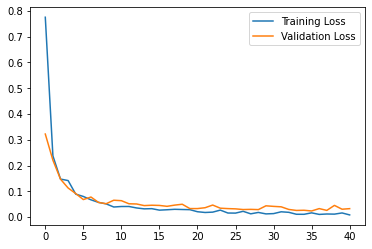

In [49]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()